# Laboratory Exercise 2 - Starter (2 points)

In this assignment, you will build a model to predict laptop prices using the provided `laptops.csv` dataset.

Your tasks are as follows:

1. Perform Exploratory Data Analysis (EDA) to understand the dataset.
2. Preprocess the data to prepare it for modeling.
3. Train and evaluate a machine learning model to predict laptop prices.

**Notes:**

- Some parts of the code are already provided. **Do not modify the existing code.**
- **Do not hard-code** any values or test data. There are hidden tests that will check your implementation.
- Write your solution only in the sections marked with `### YOUR SOLUTION`.
- Each task description indicates whether it is **automatically** or **manually graded**.
- You can verify automatically graded tasks using the cell labeled `### TEST` after each function.

***IMPORTANT NOTE:***
- Name your Jupyter Notebook as `lab_ex_2_{index}.ipynb`.
- For example, if your index is 123456, you should name your notebook as `lab_ex_2_12346.ipynb`.

In [1]:
import os
import hashlib
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import (
    PolynomialFeatures,
    StandardScaler,
    MinMaxScaler,
    LabelEncoder,
    OrdinalEncoder,
)
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, KFold
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report,
)
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    LassoCV,
    RidgeCV,
    LogisticRegression,
)
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
os.environ["PYTHONHASHSEED"] = "42"
random.seed(42)
np.random.seed(42)

RANDOM_STATE = 42

In [3]:
def hash_columns(columns):
    col_str = ",".join(sorted(columns))
    return hashlib.sha256(col_str.encode()).hexdigest()

In [4]:
def hash_series(series):
    series_str = ",".join(map(str, series.values))
    return hashlib.sha256(series_str.encode()).hexdigest()

In [5]:
def hash_data_frame(df):
    df_sorted = df.sort_index(axis=1).sort_values(by=list(df.columns))
    return hashlib.sha256(pd.util.hash_pandas_object(df_sorted, index=True).values).hexdigest()

In [6]:
df = pd.read_csv("laptops.csv")

In [7]:
df.head()

,Brand,Model,Type,Dimension (in),Screen Resolution,CPU Brand,CPU Model,CPU Frequency (GHz),GPU Brand,GPU Model,RAM (GB),HDD,SSD,OS,Weight (kg),Price (Euro)
0,HP,250 G6,Notebook,15.6,1920x1080,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,8,NaN,True,No OS,1.86,575.00
1,Asus,ZenBook UX430UN,Ultrabook,14.0,1920x1080,Intel,Core i7 8550U,1.8,Nvidia,GeForce MX150,16,False,True,Windows,1.30,1495.00
2,Acer,Swift 3,Ultrabook,14.0,1920x1080,Intel,Core i5 8250U,1.6,Intel,UHD Graphics 620,8,False,True,Windows,1.60,770.00
3,HP,250 G6,Notebook,15.6,1366x768,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,4,True,NaN,No OS,1.86,393.90
4,HP,250 G6,Notebook,15.6,1920x1080,Intel,Core i3 6006U,2.0,Intel,HD Graphics 520,4,True,False,No OS,NaN,344.99


In [10]:
### MANUALLY GRADED TASK
def calculate_descriptive_statistics(df):
    """
    Compute the descriptive statistics for all numeric columns in the dataset.
    The statistics should include: count, mean, standard deviation (std), minimum,
    25th percentile, median, 75th percentile, and maximum.
    
    Return the result as a `pd.DataFrame.
    """

    # YOUR CODE HERE
    print(df.describe())

    raise NotImplementedError()

In [11]:
calculate_descriptive_statistics(df)

       Dimension (in)  CPU Frequency (GHz)    RAM (GB)  Weight (kg)  \
count      791.000000           791.000000  791.000000   691.000000   
mean        15.287611             2.388369    8.601770     2.151999   
std          1.224031             0.371062    5.173638     0.654401   
min         12.500000             1.200000    4.000000     0.910000   
25%         14.000000             2.000000    4.000000     1.725000   
50%         15.600000             2.500000    8.000000     2.100000   
75%         15.600000             2.700000    8.000000     2.400000   
max         17.300000             2.900000   64.000000     4.700000   

       Price (Euro)  
count    791.000000  
mean    1113.184956  
std      601.993594  
min      339.000000  
25%      684.995000  
50%      973.000000  
75%     1349.000000  
max     3975.000000  


NotImplementedError: 

In [12]:
### MANUALLY GRADED TASK
def plot_pairwise_relationships(df):
    """
    Create pairwise plots to visualize the relationships between all numerical variables
    in the dataset using scatter plots and histograms.
    """
    plt.figure(figsize=(20,20))
    sns.pairplot(df,diag_kind='hist')
    plt.show()

    # YOUR CODE HERE
    raise NotImplementedError()

<Figure size 2000x2000 with 0 Axes>

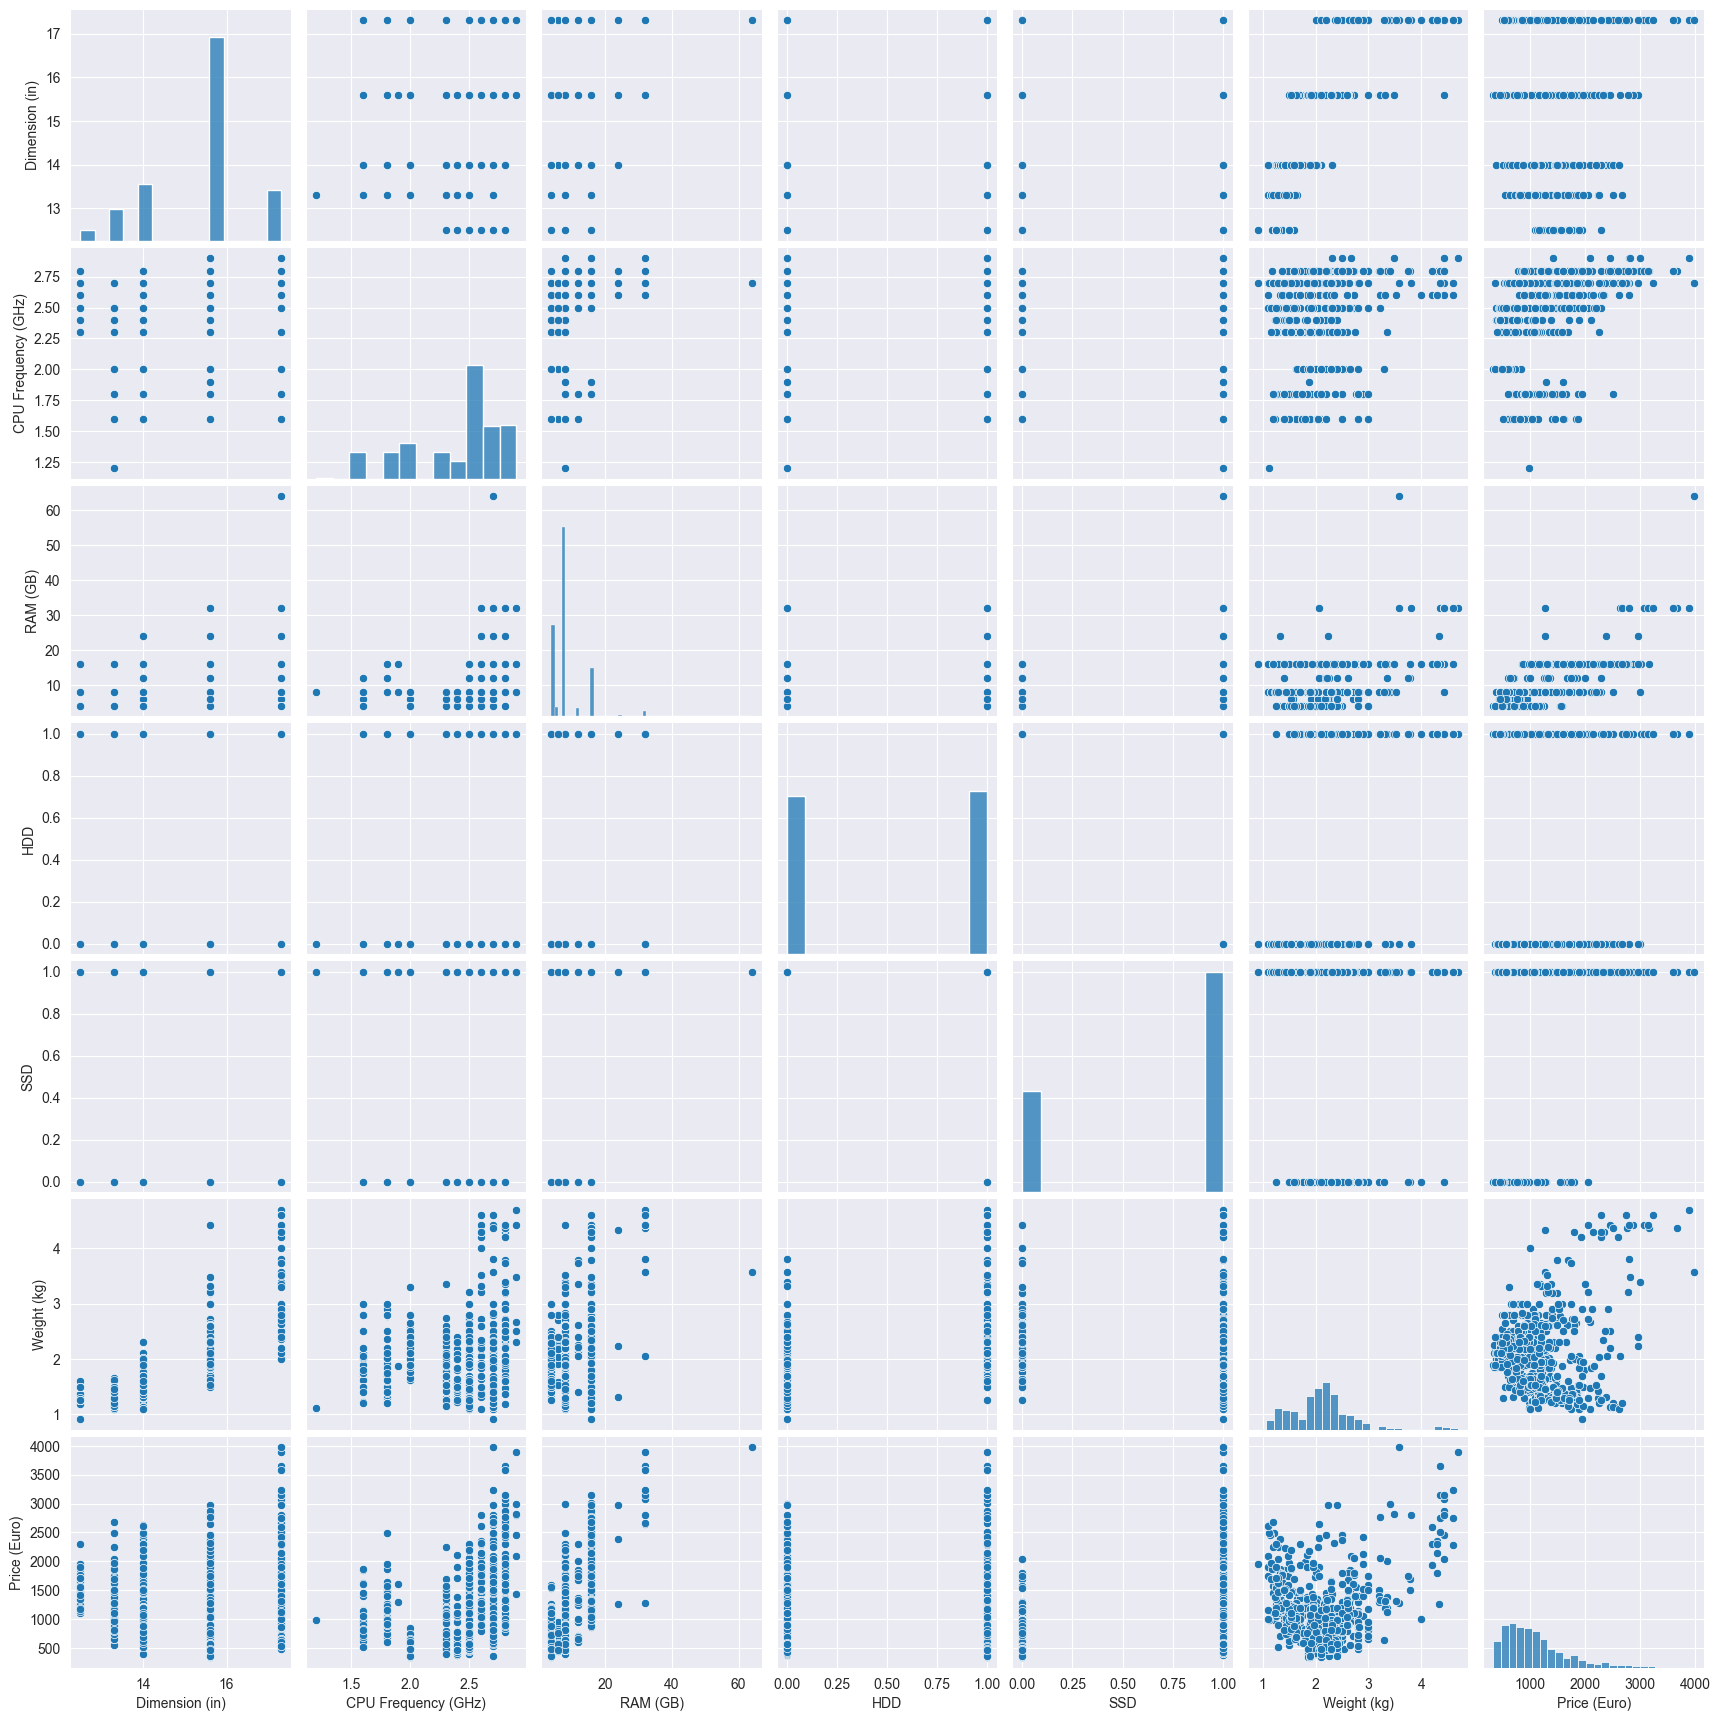

NotImplementedError: 

In [13]:
plot_pairwise_relationships(df)

In [14]:
### MANUALLY GRADED TASK
def plot_correlation_intensity(df):
    """
    Plot a heatmap showing the strength and direction of the Pearson correlation
    between all numeric variables in the dataset.
    """

    sns.heatmap(df.corr(numeric_only=True),annot=True)

    # YOUR CODE HERE
    raise NotImplementedError()

NotImplementedError: 

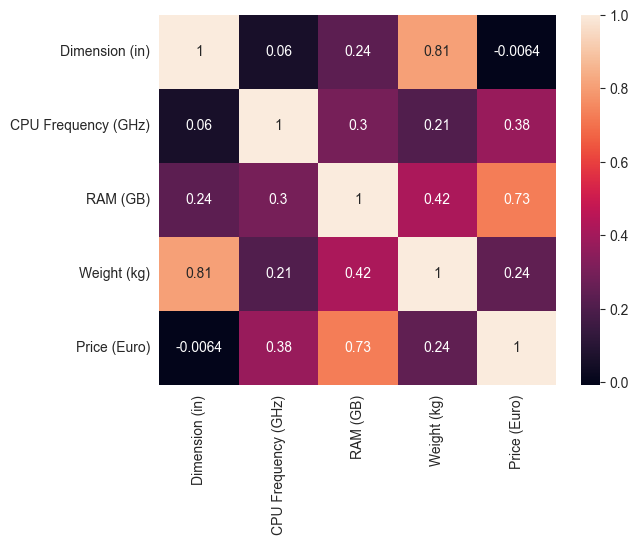

In [22]:
plot_correlation_intensity(df)

In [31]:
cols = list(df.columns)

# 2. Rename the *last* column to something unique
cols[-1] = 'Price_to_Drop'

# 3. Assign the new, unique names back to the DataFrame
df.columns = cols

# 4. Now you can safely drop the column by its unique name
df.drop(columns=['Price_to_Drop'], inplace=True)
df.head()

,Brand,Model,Type,Dimension (in),Screen Resolution,CPU Brand,CPU Model,CPU Frequency (GHz),GPU Brand,GPU Model,RAM (GB),HDD,SSD,OS,Weight (kg),Price
0,HP,250 G6,Notebook,15.6,1920x1080,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,8,NaN,True,No OS,1.86,575.00
1,Asus,ZenBook UX430UN,Ultrabook,14.0,1920x1080,Intel,Core i7 8550U,1.8,Nvidia,GeForce MX150,16,False,True,Windows,1.30,1495.00
2,Acer,Swift 3,Ultrabook,14.0,1920x1080,Intel,Core i5 8250U,1.6,Intel,UHD Graphics 620,8,False,True,Windows,1.60,770.00
3,HP,250 G6,Notebook,15.6,1366x768,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,4,True,NaN,No OS,1.86,393.90
4,HP,250 G6,Notebook,15.6,1920x1080,Intel,Core i3 6006U,2.0,Intel,HD Graphics 520,4,True,False,No OS,NaN,344.99


In [32]:
### MANUALLY GRADED TASK
def plot_price_distribution_per_type(df):
    """
    Create boxplots to show how laptop prices are distributed across different types.
    """

    plt.figure(figsize=(6,6))
    sns.boxplot(x='Type',y='Price',data=df)
    plt.xlabel('Laptop Type')
    plt.ylabel('Laptop Price')
    plt.show()

    # YOUR CODE HERE
    raise NotImplementedError()

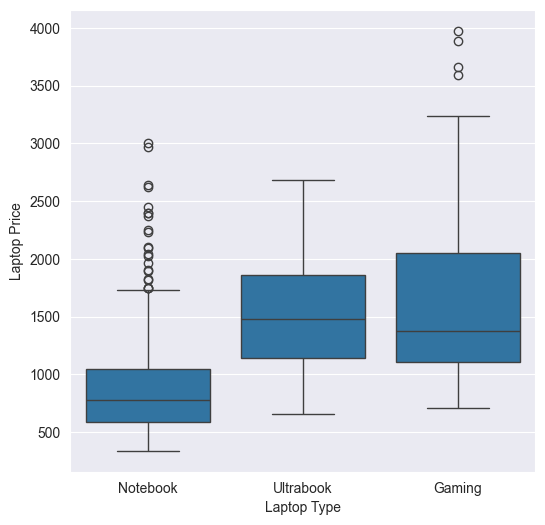

NotImplementedError: 

In [33]:
plot_price_distribution_per_type(df)

In [34]:
### MANUALLY GRADED TASK
def plot_laptop_count_per_type(df):
    """
    Create a bar plot showing the number of laptops available for each type.
    """

    counts_per_type=df['Type'].value_counts()
    plt.bar(counts_per_type.index,counts_per_type)
    plt.show()

    # YOUR CODE HERE
    raise NotImplementedError()

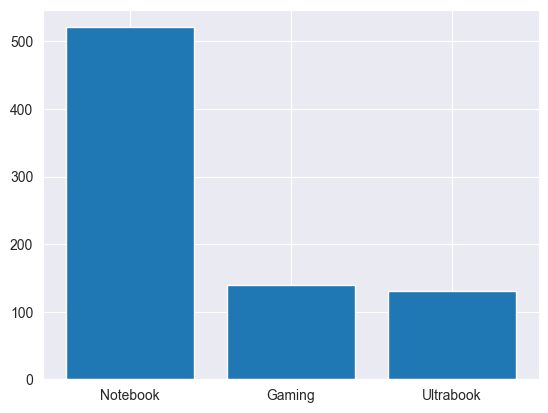

NotImplementedError: 

In [35]:
plot_laptop_count_per_type(df)

In [45]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_brand(df):
    """
    Encode the `Brand` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE


    one_hot_encodings=pd.get_dummies(df['Brand'])
    df=df.drop(columns=['Brand'])
    df=pd.concat([df,one_hot_encodings],axis=1)
    display(df.head())
    return df
    raise NotImplementedError()
    


In [48]:
df = encode_or_drop_brand(df)

KeyError: 'Brand'

In [49]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_brand(_df)
assert hash_data_frame(_df) == "bc0a5262a5a3c76876068bdd1d4aabc580e1a5d3e3bb5c508c59d5ed6a450c01"

,Model,Type,Dimension (in),Screen Resolution,CPU Brand,CPU Model,CPU Frequency (GHz),GPU Brand,GPU Model,RAM (GB),HDD,SSD,OS,Weight (kg),Price (Euro),Acer,Asus,Dell,HP,Lenovo
0,250 G6,Notebook,15.6,1920x1080,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,8,NaN,True,No OS,1.86,575.00,False,False,False,True,False
1,ZenBook UX430UN,Ultrabook,14.0,1920x1080,Intel,Core i7 8550U,1.8,Nvidia,GeForce MX150,16,False,True,Windows,1.30,1495.00,False,True,False,False,False
2,Swift 3,Ultrabook,14.0,1920x1080,Intel,Core i5 8250U,1.6,Intel,UHD Graphics 620,8,False,True,Windows,1.60,770.00,True,False,False,False,False
3,250 G6,Notebook,15.6,1366x768,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,4,True,NaN,No OS,1.86,393.90,False,False,False,True,False
4,250 G6,Notebook,15.6,1920x1080,Intel,Core i3 6006U,2.0,Intel,HD Graphics 520,4,True,False,No OS,NaN,344.99,False,False,False,True,False


In [51]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_model(df):
    """
    Encode the `Model` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    df=df.drop(columns=['Model'])

    # YOUR CODE HERE
    return df
    raise NotImplementedError()
    


In [52]:
df = encode_or_drop_model(df)

In [53]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_model(_df)
assert hash_data_frame(_df) == "2fb7e211c86372837cd099c19a3eb368088d7a41b45f676c3281e5dab2558c8f"

In [62]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_type(df):
    """
    Encode the `Type` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    df=pd.get_dummies(df,columns=['Type'])

    display(df.head())
    # YOUR CODE HERE
    return df
    raise NotImplementedError()
    


In [63]:
df = encode_or_drop_type(df)

,Dimension (in),Screen Resolution,CPU Brand,CPU Model,CPU Frequency (GHz),GPU Brand,GPU Model,RAM (GB),HDD,SSD,...,HP,Lenovo,Acer,Asus,Dell,HP,Lenovo,Type_Gaming,Type_Notebook,Type_Ultrabook
0,15.6,1920x1080,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,8,NaN,True,...,True,False,False,False,False,True,False,False,True,False
1,14.0,1920x1080,Intel,Core i7 8550U,1.8,Nvidia,GeForce MX150,16,False,True,...,False,False,False,True,False,False,False,False,False,True
2,14.0,1920x1080,Intel,Core i5 8250U,1.6,Intel,UHD Graphics 620,8,False,True,...,False,False,True,False,False,False,False,False,False,True
3,15.6,1366x768,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,4,True,NaN,...,True,False,False,False,False,True,False,False,True,False
4,15.6,1920x1080,Intel,Core i3 6006U,2.0,Intel,HD Graphics 520,4,True,False,...,True,False,False,False,False,True,False,False,True,False


In [64]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_model(_df)
assert hash_data_frame(_df) == "2fb7e211c86372837cd099c19a3eb368088d7a41b45f676c3281e5dab2558c8f"

In [75]:
### AUTOMATICALLY GRADED TASK
def split_and_cast_screen_resolution(df):
    """
    Split the `Screen Resolution` column into two new integer columns
    `Horizontal Resolution` and `Vertical Resolution`. Add these columns to the dataset
    and remove the original `Screen Resolution` column.

    
    Return the updated dataset as `pd.DataFrame`.
    """
    resolutions=df['Screen Resolution'].tolist()
    horizontal_list=[]
    vertical_list=[]
    for res in resolutions:
        horizontal,vertical=res.split('x')
        horizontal_list.append(int(horizontal))
        vertical_list.append(int(vertical))

    df['Horizontal Resolution']=horizontal_list
    df['Vertical Resolution']=vertical_list

    df.drop(columns=['Screen Resolution'],inplace=True)

    display(df)

    return df
    # YOUR CODE HERE
    raise NotImplementedError()
    


In [76]:
df = split_and_cast_screen_resolution(df)

KeyError: 'Screen Resolution'

In [77]:
_df = pd.read_csv("laptops.csv")
_df = split_and_cast_screen_resolution(_df)
assert hash_data_frame(_df) == "09262c30e1d8b769fa7bf343438f9cd9e19377e13ce232cbaad8cdb09c43fd44"

,Brand,Model,Type,Dimension (in),CPU Brand,CPU Model,CPU Frequency (GHz),GPU Brand,GPU Model,RAM (GB),HDD,SSD,OS,Weight (kg),Price (Euro),Horizontal Resolution,Vertical Resolution
0,HP,250 G6,Notebook,15.6,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,8,NaN,True,No OS,1.86,575.00,1920,1080
1,Asus,ZenBook UX430UN,Ultrabook,14.0,Intel,Core i7 8550U,1.8,Nvidia,GeForce MX150,16,False,True,Windows,1.30,1495.00,1920,1080
2,Acer,Swift 3,Ultrabook,14.0,Intel,Core i5 8250U,1.6,Intel,UHD Graphics 620,8,False,True,Windows,1.60,770.00,1920,1080
3,HP,250 G6,Notebook,15.6,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,4,True,NaN,No OS,1.86,393.90,1366,768
4,HP,250 G6,Notebook,15.6,Intel,Core i3 6006U,2.0,Intel,HD Graphics 520,4,True,False,No OS,NaN,344.99,1920,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,Dell,Inspiron 3567,Notebook,15.6,Intel,Core i3 7100U,2.4,Intel,HD Graphics 620,6,True,False,Windows,NaN,459.00,1366,768
787,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,Intel,Core i7 6700HQ,2.6,Nvidia,GeForce GTX 960M,8,NaN,NaN,Windows,2.60,899.00,1920,1080
788,Dell,Inspiron 3567,Notebook,15.6,Intel,Core i7 7500U,2.7,AMD,Radeon R5 M430,8,True,False,Linux,2.30,805.99,1366,768
789,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,Intel,Core i7 6500U,2.5,Nvidia,GeForce 920M,4,True,False,Windows,NaN,720.32,1366,768


In [80]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_cpu_brand(df):
    """
    Encode the `CPU Brand` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """
    df.drop(columns=['CPU Brand'],inplace=True)
    # YOUR CODE HERE
    return df
    raise NotImplementedError()
    


In [81]:
df = encode_or_drop_cpu_brand(df)

In [82]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_cpu_brand(_df)
hash_data_frame(_df)
assert hash_data_frame(_df) == "3343d38a78aa5244e870b515abe379128a6cbdd0c0af4c427ea35bd2b9d4c0f4"

In [104]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_cpu_model(df):
    """
    Encode the `CPU Model` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    cpu_models=df['CPU Model'].tolist()

    for i,model in enumerate(cpu_models):
        cpu_models[i]=model.split(' ')[1]
    df['CPU Series']=cpu_models
    one_hot_encodings=pd.get_dummies(df['CPU Series'])
    df=df.drop(columns=['CPU Series'])
    df=pd.concat([df,one_hot_encodings],axis=1)

    df.drop(columns=['CPU Model'],inplace=True)

    display(df.head())
    # YOUR CODE HERE
    return df
    raise NotImplementedError()
    


In [110]:
df = encode_or_drop_cpu_model(df)

KeyError: 'CPU Model'

In [105]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_cpu_model(_df)
assert hash_data_frame(_df) == "2e6601709f90f761739234d4fd5a541c0524cd39155c1e657de44340e1de9b6b"

,Brand,Model,Type,Dimension (in),Screen Resolution,CPU Brand,CPU Frequency (GHz),GPU Brand,GPU Model,RAM (GB),HDD,SSD,OS,Weight (kg),Price (Euro),i3,i5,i7
0,HP,250 G6,Notebook,15.6,1920x1080,Intel,2.5,Intel,HD Graphics 620,8,NaN,True,No OS,1.86,575.00,False,True,False
1,Asus,ZenBook UX430UN,Ultrabook,14.0,1920x1080,Intel,1.8,Nvidia,GeForce MX150,16,False,True,Windows,1.30,1495.00,False,False,True
2,Acer,Swift 3,Ultrabook,14.0,1920x1080,Intel,1.6,Intel,UHD Graphics 620,8,False,True,Windows,1.60,770.00,False,True,False
3,HP,250 G6,Notebook,15.6,1366x768,Intel,2.5,Intel,HD Graphics 620,4,True,NaN,No OS,1.86,393.90,False,True,False
4,HP,250 G6,Notebook,15.6,1920x1080,Intel,2.0,Intel,HD Graphics 520,4,True,False,No OS,NaN,344.99,True,False,False


AssertionError: 

In [113]:

one_hot_encodings=pd.get_dummies(df['CPU Series'])
df=df.drop(columns=['CPU Series'])
df=pd.concat([df,one_hot_encodings],axis=1)

In [114]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_gpu_brand(df):
    """
    Encode the `GPU Brand` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """
    one_hot_encodings=pd.get_dummies(df['GPU Brand'])
    df=pd.concat([df,one_hot_encodings],axis=1)
    display(df.head())
    # YOUR CODE HERE
    return df
    raise NotImplementedError()
    


In [115]:
df = encode_or_drop_gpu_brand(df)

,Dimension (in),CPU Frequency (GHz),GPU Brand,GPU Model,RAM (GB),HDD,SSD,OS,Weight (kg),Price,...,Nvidia,AMD,Intel,Nvidia,i3,i5,i7,AMD,Intel,Nvidia
0,15.6,2.5,Intel,HD Graphics 620,8,NaN,True,No OS,1.86,575.00,...,False,False,True,False,False,True,False,False,True,False
1,14.0,1.8,Nvidia,GeForce MX150,16,False,True,Windows,1.30,1495.00,...,True,False,False,True,False,False,True,False,False,True
2,14.0,1.6,Intel,UHD Graphics 620,8,False,True,Windows,1.60,770.00,...,False,False,True,False,False,True,False,False,True,False
3,15.6,2.5,Intel,HD Graphics 620,4,True,NaN,No OS,1.86,393.90,...,False,False,True,False,False,True,False,False,True,False
4,15.6,2.0,Intel,HD Graphics 520,4,True,False,No OS,NaN,344.99,...,False,False,True,False,True,False,False,False,True,False


In [125]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_gpu_brand(_df)
assert hash_data_frame(_df) == "9d72d28212577a75e92e38a6ba043c38cf3e638619b85eb771d76b1e60a67e9e"

,Brand,Model,Type,Dimension (in),Screen Resolution,CPU Brand,CPU Model,CPU Frequency (GHz),GPU Brand,GPU Model,RAM (GB),HDD,SSD,OS,Weight (kg),Price (Euro),AMD,Intel,Nvidia
0,HP,250 G6,Notebook,15.6,1920x1080,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,8,NaN,True,No OS,1.86,575.00,False,True,False
1,Asus,ZenBook UX430UN,Ultrabook,14.0,1920x1080,Intel,Core i7 8550U,1.8,Nvidia,GeForce MX150,16,False,True,Windows,1.30,1495.00,False,False,True
2,Acer,Swift 3,Ultrabook,14.0,1920x1080,Intel,Core i5 8250U,1.6,Intel,UHD Graphics 620,8,False,True,Windows,1.60,770.00,False,True,False
3,HP,250 G6,Notebook,15.6,1366x768,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,4,True,NaN,No OS,1.86,393.90,False,True,False
4,HP,250 G6,Notebook,15.6,1920x1080,Intel,Core i3 6006U,2.0,Intel,HD Graphics 520,4,True,False,No OS,NaN,344.99,False,True,False


AssertionError: 

In [126]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_gpu_model(df):
    """
    Encode the `GPU Model` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """
    df.drop(columns=['GPU Model'],inplace=True)
    # YOUR CODE HERE
    return df

    raise NotImplementedError()


In [127]:
df = encode_or_drop_gpu_model(df)

KeyError: "['GPU Model'] not found in axis"

In [128]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_gpu_model(_df)
assert hash_data_frame(_df) == "2b9f5feb888687e9c01adb73dfb64d52e93e85c7356423028ce3b6ca35825b3a"

In [131]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_os(df):
    """
    Encode the `OS` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    one_hot_encodings=pd.get_dummies(df['OS'])
    df=pd.concat([df,one_hot_encodings],axis=1)
    df.drop(columns=['OS'],inplace=True)
    # YOUR CODE HERE
    return df
    raise NotImplementedError()
    


In [132]:
df = encode_or_drop_os(df)

In [133]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_os(_df)
assert hash_data_frame(_df) == "a3996c22b8e19ebc9ef0a3ae5625a9d05b41e3d05f81335345d3f6760a16ac54"

In [148]:
### AUTOMATICALLY GRADED TASK
def impute_hdd_and_ssd(df):
    """
    Fill in missing values in the `HDD` and `SSD` columns.

    Use `random_state=RANDOM_STATE` to ensure reproducibility.

    Return the updated dataset as a `pd.DataFrame`.
    """

    constant_imputer=SimpleImputer(strategy='constant',fill_value=False)
    df["HDD"] = constant_imputer.fit_transform([df["HDD"]])[0]
    df["SSD"] = constant_imputer.fit_transform([df["SSD"]])[0]


    display(df)
    # YOUR CODE HERE
    return df
    raise NotImplementedError()
    


In [141]:
df = impute_hdd_and_ssd(df)

In [149]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = impute_hdd_and_ssd(_df)
assert hash_data_frame(_df) == "48460c7730ee69a4b1138807c225223e328afd74b91f4c0de0377fe13d5af522"

C:\Users\dimit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:574: FutureWarning: Currently, when `keep_empty_feature=False` and `strategy="constant"`, empty features are not dropped. This behaviour will change in version 1.8. Set `keep_empty_feature=True` to preserve this behaviour.
  warnings.warn(
C:\Users\dimit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:574: FutureWarning: Currently, when `keep_empty_feature=False` and `strategy="constant"`, empty features are not dropped. This behaviour will change in version 1.8. Set `keep_empty_feature=True` to preserve this behaviour.
  warnings.warn(


,Brand,Model,Type,Dimension (in),Screen Resolution,CPU Brand,CPU Model,CPU Frequency (GHz),GPU Brand,GPU Model,RAM (GB),HDD,SSD,OS,Weight (kg),Price (Euro)
0,HP,250 G6,Notebook,15.6,1920x1080,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,8,False,True,No OS,1.86,575.00
1,Asus,ZenBook UX430UN,Ultrabook,14.0,1920x1080,Intel,Core i7 8550U,1.8,Nvidia,GeForce MX150,16,False,True,Windows,1.30,1495.00
2,Acer,Swift 3,Ultrabook,14.0,1920x1080,Intel,Core i5 8250U,1.6,Intel,UHD Graphics 620,8,False,True,Windows,1.60,770.00
3,HP,250 G6,Notebook,15.6,1366x768,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,4,True,False,No OS,1.86,393.90
4,HP,250 G6,Notebook,15.6,1920x1080,Intel,Core i3 6006U,2.0,Intel,HD Graphics 520,4,True,False,No OS,NaN,344.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel,Core i3 7100U,2.4,Intel,HD Graphics 620,6,True,False,Windows,NaN,459.00
787,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,1920x1080,Intel,Core i7 6700HQ,2.6,Nvidia,GeForce GTX 960M,8,False,False,Windows,2.60,899.00
788,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel,Core i7 7500U,2.7,AMD,Radeon R5 M430,8,True,False,Linux,2.30,805.99
789,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,Nvidia,GeForce 920M,4,True,False,Windows,NaN,720.32


AssertionError: 

In [160]:
### AUTOMATICALLY GRADED TASK
def impute_weight(df):
    """
    Fill in missing values in the `Weight (kg)` column.

    Use `random_state=RANDOM_STATE` to ensure reproducibility.

    Return the updated dataset as a `pd.DataFrame`.
    """

    original_index=df.index
    numeric_cols = df.select_dtypes(include=np.number).columns
    min_max_scaler=MinMaxScaler()

    scaled_data=min_max_scaler.fit_transform(df[numeric_cols])
    knn_imputer = KNNImputer(n_neighbors=5)
    imputed_scaled_data = knn_imputer.fit_transform(scaled_data)
    imputed_data_unscaled = min_max_scaler.inverse_transform(imputed_scaled_data)
    df[numeric_cols] = pd.DataFrame(imputed_data_unscaled,
                                columns=numeric_cols,
                                index=original_index)



    display(df)
    return df
    # YOUR CODE HERE
    raise NotImplementedError()
    


In [182]:
df = impute_weight(df)
df['Weight (kg)'].isnull().sum()


,Dimension (in),CPU Frequency (GHz),GPU Brand,RAM (GB),HDD,SSD,Weight (kg),Price (Euro),Acer,Asus,...,i7,AMD,Intel,Nvidia,Linux,No OS,Windows,Linux,No OS,Windows
0,15.6,2.5,Intel,8.0,False,True,1.860000,575.00,False,False,...,False,False,True,False,False,True,False,False,True,False
1,14.0,1.8,Nvidia,16.0,False,True,1.300000,1495.00,False,True,...,True,False,False,True,False,False,True,False,False,True
2,14.0,1.6,Intel,8.0,False,True,1.600000,770.00,True,False,...,False,False,True,False,False,False,True,False,False,True
3,15.6,2.5,Intel,4.0,True,False,1.860000,393.90,False,False,...,False,False,True,False,False,True,False,False,True,False
4,15.6,2.0,Intel,4.0,True,False,1.986667,344.99,False,False,...,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,15.6,2.4,Intel,6.0,True,False,2.300000,459.00,False,False,...,False,False,True,False,False,False,True,False,False,True
787,15.6,2.6,Nvidia,8.0,False,False,2.600000,899.00,False,False,...,True,False,False,True,False,False,True,False,False,True
788,15.6,2.7,AMD,8.0,True,False,2.300000,805.99,False,False,...,True,True,False,False,True,False,False,True,False,False
789,15.6,2.5,Nvidia,4.0,True,False,2.196667,720.32,False,True,...,True,False,False,True,False,False,True,False,False,True


In [183]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = impute_weight(_df)
assert hash_data_frame(_df) == "2dc75df9d166ac93c946a68940ea318bbff0c3881a25e58af7495203512340b0"

,Brand,Model,Type,Dimension (in),Screen Resolution,CPU Brand,CPU Model,CPU Frequency (GHz),GPU Brand,GPU Model,RAM (GB),HDD,SSD,OS,Weight (kg),Price (Euro)
0,HP,250 G6,Notebook,15.6,1920x1080,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,8.0,NaN,True,No OS,1.860,575.00
1,Asus,ZenBook UX430UN,Ultrabook,14.0,1920x1080,Intel,Core i7 8550U,1.8,Nvidia,GeForce MX150,16.0,False,True,Windows,1.300,1495.00
2,Acer,Swift 3,Ultrabook,14.0,1920x1080,Intel,Core i5 8250U,1.6,Intel,UHD Graphics 620,8.0,False,True,Windows,1.600,770.00
3,HP,250 G6,Notebook,15.6,1366x768,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,4.0,True,NaN,No OS,1.860,393.90
4,HP,250 G6,Notebook,15.6,1920x1080,Intel,Core i3 6006U,2.0,Intel,HD Graphics 520,4.0,True,False,No OS,2.102,344.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel,Core i3 7100U,2.4,Intel,HD Graphics 620,6.0,True,False,Windows,2.300,459.00
787,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,1920x1080,Intel,Core i7 6700HQ,2.6,Nvidia,GeForce GTX 960M,8.0,NaN,NaN,Windows,2.600,899.00
788,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel,Core i7 7500U,2.7,AMD,Radeon R5 M430,8.0,True,False,Linux,2.300,805.99
789,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,Nvidia,GeForce 920M,4.0,True,False,Windows,2.214,720.32


AssertionError: 

In [184]:
df.rename(columns={'Price':'Price (Euro)'},inplace=True)
df.head()

,Dimension (in),CPU Frequency (GHz),RAM (GB),HDD,SSD,Weight (kg),Price (Euro),Acer,Asus,Dell,...,i7,AMD,Intel,Nvidia,Linux,No OS,Windows,Linux,No OS,Windows
0,15.6,2.5,8.0,False,True,1.860000,575.00,False,False,False,...,False,False,True,False,False,True,False,False,True,False
1,14.0,1.8,16.0,False,True,1.300000,1495.00,False,True,False,...,True,False,False,True,False,False,True,False,False,True
2,14.0,1.6,8.0,False,True,1.600000,770.00,True,False,False,...,False,False,True,False,False,False,True,False,False,True
3,15.6,2.5,4.0,True,False,1.860000,393.90,False,False,False,...,False,False,True,False,False,True,False,False,True,False
4,15.6,2.0,4.0,True,False,1.986667,344.99,False,False,False,...,False,False,True,False,False,True,False,False,True,False


In [185]:
### AUTOMATICALLY GRADED TASK
def partition_dataset(df):
    """
    Split the dataset into features (X) and target (y), where the target is `Price (Euro)`.
    Then, divide X and y into training and test sets using an 80:20 ratio.

    Use `random_state=RANDOM_STATE` to ensure reproducibility.
    
    Return the sets in the following order: train_X, test_X, train_y, test_y.
    """

    X,y=df.drop(columns=['Price (Euro)']),df['Price (Euro)']

    train_X, test_X, train_y, test_y=train_test_split(X,y,test_size=0.2,random_state=RANDOM_STATE)
    return train_X, test_X, train_y, test_y


    # YOUR CODE HERE

    raise NotImplementedError()
    


In [186]:
train_X, test_X, train_y, test_y = partition_dataset(df)

In [187]:
_df = pd.read_csv("laptops.csv")
_train_X, _test_X, _train_y, _test_y = partition_dataset(_df)
assert hash_data_frame(_train_X) == "04956da18ddf9c388d041b45004345b13b298ca0310967592c46e5c9b650de45"
assert hash_data_frame(_test_X) == "2be390f98b560ff81ecb70ac0630d81c50a932b68368f7f09b9d71ef02aaf23f"
assert hash_series(_train_y) == "314cbe0e97f0eade41a16b7ace6d97563f05a194f613947b3fc517b74472cf0a"
assert hash_series(_test_y) == "9211c8582f77328da6cfb22a0411523225a83f2bf4be9fabc60e97ab717c7601"

In [188]:
### AUTOMATICALLY GRADED TASK
def fit_model(train_X, train_y):
    """
    Train a Lasso (L1-regularized) linear regression model with cross-validation.
    - Use `alphas=[0.001, 0.01, 0.1, 1.0, 10.0]`.
    - Perform 10-fold cross-validation to select the best `alpha`.

    Return the trained model.
    """


    model = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], cv=10).fit(train_X, train_y)

    # YOUR CODE HERE
    return model
    raise NotImplementedError()
    


In [189]:
scaler = MinMaxScaler()
train_y = scaler.fit_transform(train_y.to_numpy().reshape(-1, 1)).reshape(-1)

In [190]:
model = fit_model(train_X, train_y)

In [191]:
### TEST
_df = pd.read_csv("laptops.csv")
_model = fit_model(_df[["Dimension (in)", "CPU Frequency (GHz)", "RAM (GB)"]], _df["Price (Euro)"])
assert _model.alpha_.item() == 0.1
coef1, coef2, coef3 = _model.coef_.tolist()
assert int(coef1) == -91 and int(coef2) == 286 and int(coef3) == 83
assert int(_model.intercept_) == 1111

In [192]:
pred_y = model.predict(test_X)

In [193]:
pred_y = scaler.inverse_transform(pred_y.reshape(-1, 1)).reshape(-1)

In [194]:
### MANUALLY GRADED TASK
def evaluate_model(test_y, pred_y):
    """
    Evaluate the model's predictions using different metrics.
    
    Print the results.
    """
    print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
    print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
    print(f"MSE: {mean_squared_error(test_y, pred_y)}")
    print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
    print(f"R2 Score: {r2_score(test_y, pred_y)}")

    # YOUR CODE HERE
    raise NotImplementedError()

In [195]:
evaluate_model(test_y, pred_y)

MAE: 236.81455175766268
MAPE: 0.23459204737740788
MSE: 102384.49715328513
RMSE: 319.9757758851209
R2 Score: 0.6492433383398781


NotImplementedError: 

In [196]:
### AUTOMATICALLY GRADED TASK
def perform_feature_selection(model, train_X, test_X):
    """
    Select features based on the trained model.
    Keep only the selected features in both training and test sets.

    Return the updated train_X and test_X.
    """

    coeficients=model.coef_
    selected_mask=np.abs(coeficients)>1e-5
    selected_features=train_X.columns[selected_mask]
    train_X=train_X[selected_features]
    test_X=test_X[selected_features]


    # YOUR CODE HERE
    return train_X, test_X
    raise NotImplementedError()
    


In [197]:
train_X, test_X = perform_feature_selection(model, train_X, test_X)

In [198]:
### TEST
_df = pd.read_csv("laptops.csv")
_model = fit_model(_df[["Dimension (in)", "RAM (GB)"]][:500], _df["CPU Frequency (GHz)"][:500])
_train_X, _test_X = perform_feature_selection(_model, _df[["Dimension (in)", "RAM (GB)"]][:500], _df[["Dimension (in)", "RAM (GB)"]][500:])
assert hash_data_frame(_train_X) == "4610875da9717f5758faeccc5dec8e6555bc18967aaa058ad1b2b8b503101b57"
assert hash_data_frame(_test_X) == "a429556e734d7d17615e856fced0de8943c7914f54797d316c9c44e4d1144052"